PyGSLIB
========

Probplot
---------------





In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib as gslib  
import numpy as np

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= gslib.read_gslib_file('../datasets/cluster.dat')  

In [3]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0
mydata['bhid']=1

# printing to verify results
print ' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5)

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619          0   
1        5.5        1.5     0.06       0.27                1.619          0   
2       38.5        5.5     0.08       0.40                1.416          0   
3       20.5        1.5     0.09       0.39                1.821          0   
4       27.5       14.5     0.09       0.24                1.349          0   

   bhid  
0     1  
1     1  
2     1  
3     1  
4     1  


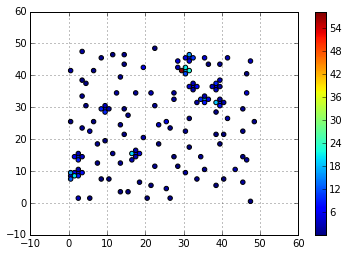

In [4]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

## Testing histplot

This is not plotting results but is handy to get declustered bins for plots 



In [5]:
print gslib.__fgslib.probplt.__doc__

binval,cl,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax,xcvr,xmen,xvar,error = probplt(iwt,va,wt,[nd])

Wrapper for ``probplt``.

Parameters
----------
iwt : input int
va : input rank-1 array('d') with bounds (nd)
wt : input rank-1 array('d') with bounds (nd)

Other Parameters
----------------
nd : input int, optional
    Default: len(va)

Returns
-------
binval : rank-1 array('d') with bounds (nd)
cl : rank-1 array('d') with bounds (nd)
xpt025 : float
xlqt : float
xmed : float
xuqt : float
xpt975 : float
xmin : float
xmax : float
xcvr : float
xmen : float
xvar : float
error : int



In [6]:
mydata['Declustering Weight'].sum()

140.00299999999999

In [7]:
parameters_probplt = {
        'iwt'  : 0,                             #int, 1 use declustering weight
        'va'   : mydata['Primary'],             # array('d') with bounds (nd)
        'wt'   : mydata['Declustering Weight']} # array('d') with bounds (nd), wight variable (obtained with declust?)

parameters_probpltl =  {
        'iwt'  : 1,                             #int, 1 use declustering weight
        'va'   : mydata['Primary'],             # array('d') with bounds (nd)
        'wt'   : mydata['Declustering Weight']} # array('d') with bounds (nd), wight variable (obtained with declust?)


binval,cl,xpt025,xlqt,xmed,xuqt,xpt975,xmin,xmax,xcvr,xmen,xvar,error = gslib.__fgslib.probplt(**parameters_probplt)
binvall,cll,xpt025l,xlqtl,xmedl,xuqtl,xpt975l,xminl,xmaxl,xcvrl,xmenl,xvarl,errorl = gslib.__fgslib.probplt(**parameters_probpltl)


In [8]:
print cl
print binvall

[  0.06   0.06   0.08   0.09   0.09   0.1    0.1    0.11   0.11   0.16
   0.16   0.17   0.18   0.19   0.19   0.19   0.22   0.24   0.26   0.28
   0.28   0.31   0.32   0.33   0.34   0.34   0.34   0.4    0.45   0.46
   0.51   0.57   0.62   0.65   0.67   0.71   0.79   0.81   0.83   0.84
   0.89   0.92   0.93   0.94   0.96   0.99   0.99   1.01   1.02   1.1
   1.11   1.21   1.21   1.27   1.34   1.36   1.37   1.38   1.38   1.66
   1.7    1.71   1.78   1.81   1.82   1.89   1.96   1.98   2.13   2.17
   2.22   2.28   2.33   2.33   2.34   2.47   2.51   2.52   2.55   2.74
   2.75   2.76   2.82   2.84   2.96   2.97   2.99   3.04   3.21   3.33
   3.35   3.51   3.56   3.59   3.61   3.64   3.81   4.29   4.6    4.89
   4.92   5.05   5.15   5.26   5.31   5.38   5.54   5.54   6.26   6.41
   6.49   7.53   7.56   7.71   7.92   7.94   8.03   8.34   8.48   8.71
   8.9    9.01   9.08   9.08   9.27   9.42  10.2   10.27  11.08  12.74
  15.77  15.77  17.19  18.64  18.76  19.44  20.35  21.08  22.75  58.32]
[ 0.00

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f45d5aed210>>

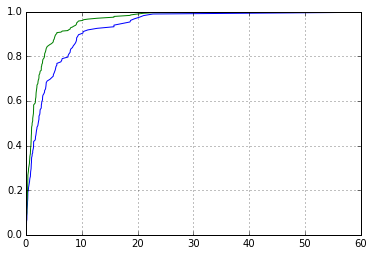

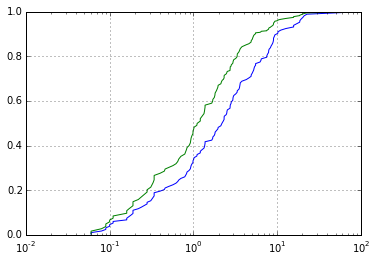

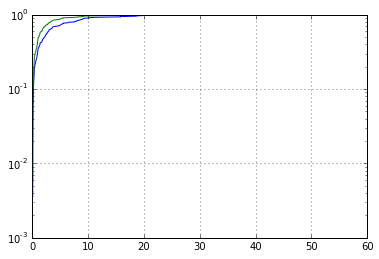

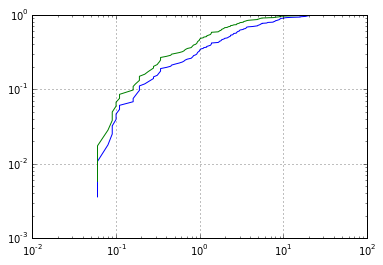

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (cl, binval)
plt.plot (cll, binvall)
plt.grid(True)
fig.show


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (cl, binval)
plt.plot (cll, binvall)
ax.set_xscale('log')
plt.grid(True)
fig.show


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (cl, binval)
plt.plot (cll, binvall)
ax.set_yscale('log')
plt.grid(True)
fig.show


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (cl, binval)
plt.plot (cll, binvall)
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid(True)
fig.show

In [10]:
print 'data min, max: ', xmin, xmax
print 'data quantile 2.5%, 25%, 50%, 75%, 97.75%: ' , xpt025,xlqt,xmed,xuqt,xpt975
print 'data cv, mean, variance : ',  xcvr,xmen,xvar
print 'error <> 0? Then all ok?' , error==0


data min, max:  0.06 58.32
data quantile 2.5%, 25%, 50%, 75%, 97.75%:  0.09 0.69 2.195 5.345 20.3500024366
data cv, mean, variance :  1.54066617191 4.35042857143 44.9242855306
error <> 0? Then all ok? True
